Reproducing work [in this article](https://appliedmachinelearning.blog/2017/11/25/unsupervised-changed-detection-in-multi-temporal-satellite-images-using-pca-k-means-python-code/). 

A simple intro to PCA is [here](http://dilloncamp.com/projects/pca.html)

TLDR is we use PCA for dimensionality reduction and use the X principle components as features for our k-means algorithm.

Basic process is:
1. Compute difference image
2. Determine principle components of the difference image
.
.
.

## Imports

In [143]:

import matplotlib.pyplot as plt
import numpy as np
from skimage import io, filters, feature
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
import imageio
% matplotlib inline

UsageError: Line magic function `%` not found.


Little trick to list package versions

In [144]:
!pip show scikit-image|grep Version

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [145]:
!pip show scikit-learn|grep Version

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [146]:
!pip show numpy|grep Version

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
Version: 1.8.0rc1
Location: /System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python


## Get familiar with imagery
We start with a visual inspection of our imagery, calculate the absolute difference and apply a couple of filters.

In [147]:
ls

Clipped_NDVI/                       awifs_ndvi_201707_15_1_clipped.tif
CubbieStation_08232013.jpg*         change_detection.ipynb
CubbieStation_08311987.jpg*         diff_image/
README.md                           diff_image1/
awifs_ndvi_201701_15_1_clipped.tif  diff_image_restored/
awifs_ndvi_201701_15_2_clipped.tif  diff_image_restored1/


In [148]:
# image1 = io.imread('awifs_ndvi_201701_15_1_clipped.tif')
# image2 = io.imread('awifs_ndvi_201707_15_1_clipped.tif')
def function(image1,image2,imagename,flag):
    diff_image = abs(image1-image2)/(image1+image2)
#     print(diff_image.shape)
    fig_width = 20
    fig_height = 8

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(fig_width, fig_height))
    if flag:
        ax1.imshow(image1, cmap="gray") 
        ax2.imshow(image2, cmap="gray") 
        ax3.imshow(diff_image, cmap="hot"); # crudely calc difference
    n_components=100

    pca = PCA(n_components=n_components)
    pca.fit(diff_image)

    diff_image_pca = pca.fit_transform(diff_image)
    print(diff_image_pca.shape)

    diff_image_restored = pca.inverse_transform(diff_image_pca)
    print(diff_image_restored.shape)
    np.sum(pca.explained_variance_ratio_)
    print(f"The {n_components} components explain {int(np.sum(pca.explained_variance_ratio_) * 100)}% of the variance")
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

    if flag:
        ax1.imshow(diff_image, cmap="gray")
        ax2.imshow(diff_image_restored, cmap="gray"); # crudely calc difference
    else:
        imageio.imwrite("diff_image1/"+imagename+"diff_image.jpg",diff_image)
        imageio.imwrite("diff_image_restored1/"+imagename+"diff_image_restored.jpg",diff_image_restored)

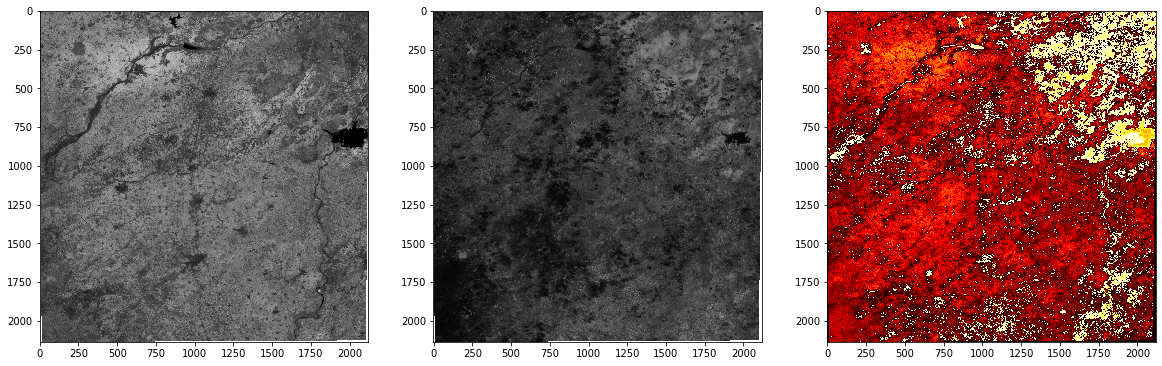

A couple of things to note from this comparison:
* There is a lot of noise/change we dont care about
* Clouds will need to be handled in real scenario

## Determine Principle components
The original article rolls its own methods for calculating the principle components of the difference image, but sklearn provides us that functionality

(2135, 100)
(2135, 2118)


0.5772656203832852

The 100 components explain 57% of the variance


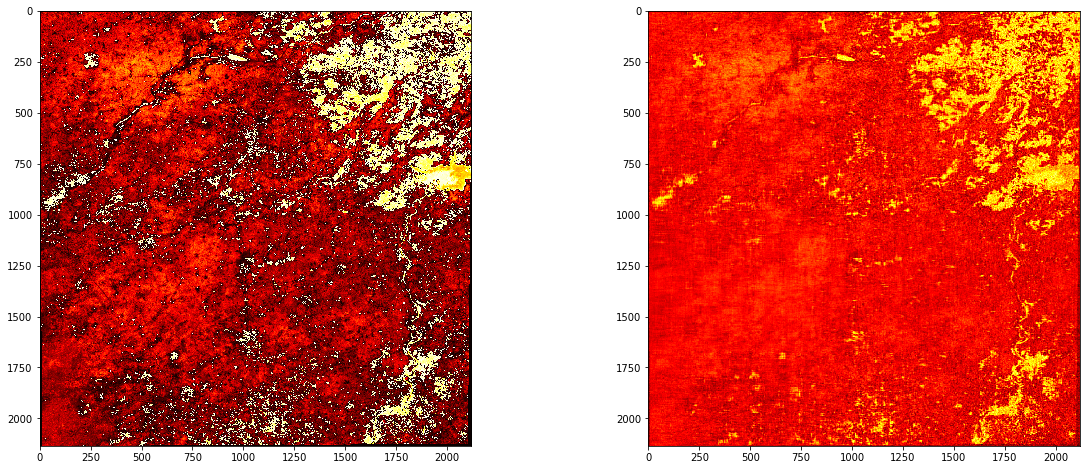

In [149]:
import os
img_pt_p=r'/Users/venkateshbh/Desktop/satellite-image-deep-learning-master/change_detection/using_pca_and_k_means/Clipped_NDVI'
arr=[]
for k in os.listdir(r'//Users/venkateshbh/Desktop/satellite-image-deep-learning-master/change_detection/using_pca_and_k_means/Clipped_NDVI'):
                    if k=='.DS_Store':
                        continue
                    print(k)
                    arr.append(k)
#                     img_pt=img_pt_p+"/"+k
#                     img = cv2.imread(img_pt)
    
#                     dim = (width, height)
#                     # resize image
#                     resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#                     #im_unpre.append(np.array(img).flatten())
#                     img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#                     equ = cv2.equalizeHist(img_gray)
#                     equu.append(equ)
#                     immatrix.append(img_gray)
#                     kk=k[:-5]
#                     #print(kk)
#                     Y.append(myDict[kk])
arr.sort()
print(arr)

awifs_ndvi_201706_15_1_clipped.tif
awifs_ndvi_201805_15_1_clipped.tif
awifs_ndvi_201703_15_2_clipped.tif
awifs_ndvi_201811_15_1_clipped.tif
awifs_ndvi_201712_15_1_clipped.tif
awifs_ndvi_201708_15_2_clipped.tif
awifs_ndvi_201810_15_2_clipped.tif
awifs_ndvi_201709_15_1_clipped.tif
awifs_ndvi_201804_15_2_clipped.tif
awifs_ndvi_201707_15_2_clipped.tif
awifs_ndvi_201801_15_1_clipped.tif
awifs_ndvi_201702_15_1_clipped.tif
awifs_ndvi_201801_15_2_clipped.tif
awifs_ndvi_201702_15_2_clipped.tif
awifs_ndvi_201804_15_1_clipped.tif
awifs_ndvi_201707_15_1_clipped.tif
awifs_ndvi_201709_15_2_clipped.tif
awifs_ndvi_201810_15_1_clipped.tif
awifs_ndvi_201708_15_1_clipped.tif
awifs_ndvi_201811_15_2_clipped.tif
awifs_ndvi_201712_15_2_clipped.tif
awifs_ndvi_201703_15_1_clipped.tif
awifs_ndvi_201706_15_2_clipped.tif
awifs_ndvi_201805_15_2_clipped.tif
awifs_ndvi_201809_15_2_clipped.tif
awifs_ndvi_201710_15_1_clipped.tif
awifs_ndvi_201701_15_2_clipped.tif
awifs_ndvi_201802_15_2_clipped.tif
awifs_ndvi_201704_15

/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

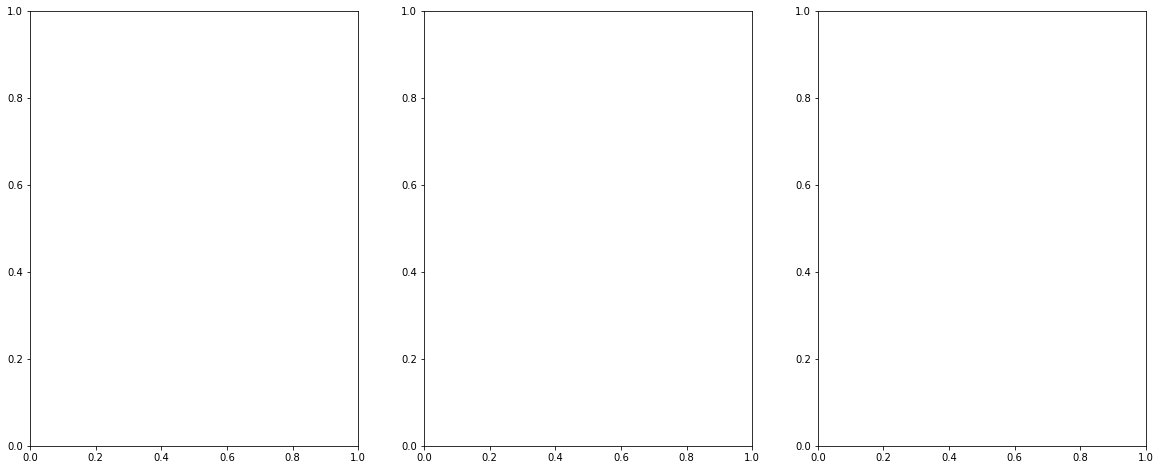

In [151]:
image1=io.imread('Clipped_NDVI/'+arr[0])
for i in range(1,len(arr)):
    
    
    image2=io.imread('Clipped_NDVI/'+arr[i])
    
    function(image1,image2,str(i),False)
    

(2135, 100)
(2135, 2118)
The 100 components explain 57% of the variance


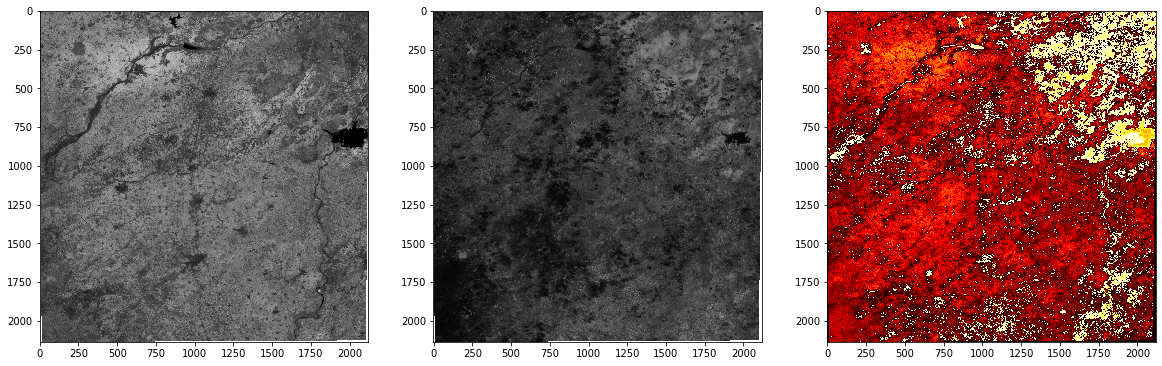

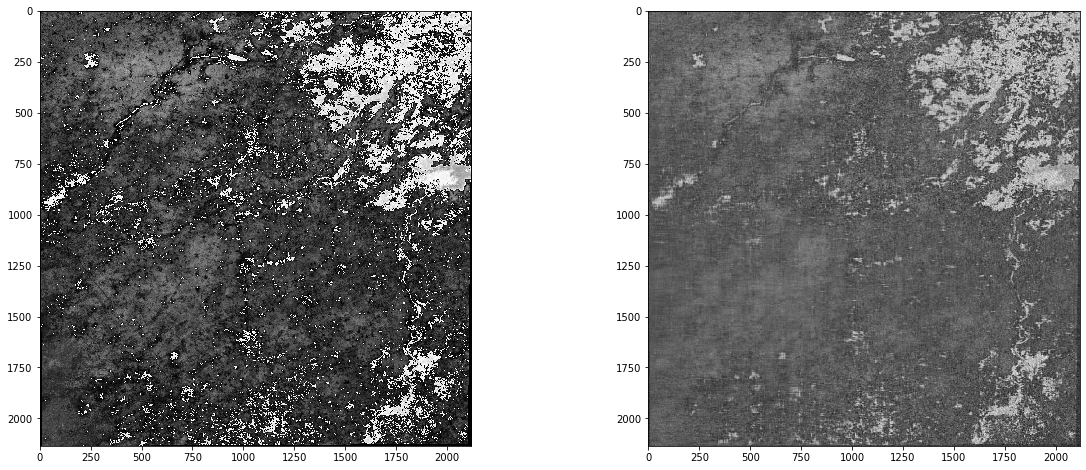

In [123]:
image1 = io.imread('awifs_ndvi_201701_15_1_clipped.tif')
image2 = io.imread('awifs_ndvi_201707_15_1_clipped.tif')

function(image1,image2,str(0),True)

In [126]:
brr=[]
img_pt_p=r'/Users/venkateshbh/Desktop/satellite-image-deep-learning-master/change_detection/using_pca_and_k_means/diff_image'

for k in os.listdir(r'//Users/venkateshbh/Desktop/satellite-image-deep-learning-master/change_detection/using_pca_and_k_means/diff_image'):
                    if k=='.DS_Store':
                        continue
                    print(k)
                    brr.append(k)
#                     img_pt=img_pt_p+"/"+k
#                     img = cv2.imread(img_pt)
    
#                     dim = (width, height)
#                     # resize image
#                     resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#                     #im_unpre.append(np.array(img).flatten())
#                     img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#                     equ = cv2.equalizeHist(img_gray)
#                     equu.append(equ)
#                     immatrix.append(img_gray)
#                     kk=k[:-5]
#                     #print(kk)
#                     Y.append(myDict[kk])
brr.sort()
print(brr)

41diff_image.jpg
9diff_image.jpg
45diff_image.jpg
31diff_image.jpg
26diff_image.jpg
22diff_image.jpg
35diff_image.jpg
25diff_image.jpg
32diff_image.jpg
36diff_image.jpg
21diff_image.jpg
18diff_image.jpg
42diff_image.jpg
46diff_image.jpg
4diff_image.jpg
12diff_image.jpg
38diff_image.jpg
16diff_image.jpg
28diff_image.jpg
11diff_image.jpg
15diff_image.jpg
7diff_image.jpg
3diff_image.jpg
14diff_image.jpg
10diff_image.jpg
29diff_image.jpg
2diff_image.jpg
6diff_image.jpg
1diff_image.jpg
5diff_image.jpg
17diff_image.jpg
39diff_image.jpg
13diff_image.jpg
19diff_image.jpg
20diff_image.jpg
37diff_image.jpg
33diff_image.jpg
24diff_image.jpg
47diff_image.jpg
43diff_image.jpg
44diff_image.jpg
8diff_image.jpg
40diff_image.jpg
34diff_image.jpg
23diff_image.jpg
27diff_image.jpg
30diff_image.jpg
['10diff_image.jpg', '11diff_image.jpg', '12diff_image.jpg', '13diff_image.jpg', '14diff_image.jpg', '15diff_image.jpg', '16diff_image.jpg', '17diff_image.jpg', '18diff_image.jpg', '19diff_image.jpg', '1diff_im

In [139]:
means = []
for k in range(len(brr)):
    image3=io.imread('diff_image/'+brr[k])
    sumi = 0
    count = 0
    for i in range(0,len(image3)):
        for j in range(0,len(image3[i])):
            count += 1
            sumi += image3[i][j]
    print(sumi/count)
    means.append(sumi/count)
    
image3.shape

55.29398553272607
57.565463861669684
74.00096396892478
83.48461807237176
68.5277237816596
100.49202796151201
142.44537089251713
160.6234687401176
158.61477024190998
148.84133168801816
102.2053645235552
135.27280519601143
147.16836970054823
140.52697321718824
201.22056842985185
131.71579900617655
164.95684563891967
160.46326015661455
74.15241744122532
55.2249711959274
57.49867003690902
135.32652363039676
43.58058395419655
84.28922915657695
54.20256903578782
46.25352913468364
47.562159741526294
65.7297702529672
70.05581245176285
77.27162804377777
68.92109232119914
87.12258792152907
83.67506639863952
103.76117631188453
153.94377356571198
149.14211940476744
113.15362400567899
75.81208444182019
95.13275526158078
67.34364220587227
102.06935799536923
63.907348189821604
44.85872713642184
49.408642990935284
55.14147543195052
54.96103433710827
49.68472930806094


(2135, 2118)

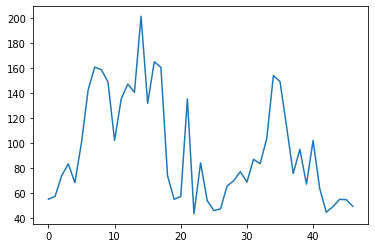

In [140]:
plt.plot(means)

In [153]:


from scipy.interpolate import spline

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(means.min(), means.max(), 300)  

power_smooth = spline(means, xnew)

plt.plot(xnew,power_smooth)
plt.show()

ImportError: cannot import name 'spline' from 'scipy.interpolate' (/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/scipy/interpolate/__init__.py)

In [137]:
sumi = 0
count = 0
for i in range(0,len(image3)):
    for j in range(0,len(image3[i])):
        count += 1
        sumi += image3[i][j]
print(sumi)
print(count)
print(sumi/count)

250035532
4521930
55.29398553272607


In [141]:
means1 = []
for k in range(len(arr)):
    image3=io.imread('Clipped_NDVI/'+arr[k])
    sumi = 0
    count = 0
    for i in range(0,len(image3)):
        for j in range(0,len(image3[i])):
            count += 1
            sumi += image3[i][j]
    print(sumi/count)
    means1.append(sumi/count)
    
image3.shape

100.44611614952022
99.1444175385289
103.7911044620328
89.95548360987455
82.02368501944966
69.17134962283804
71.72926803378203
79.16205314987185
76.21287038941337
70.23085916854086
67.1144301216516
54.691335558047115
58.20375392807938
20.731521717496733
44.61250041464596
85.46616864922721
108.45517599785933
119.23950171718712
113.53328534497437
106.89770142394951
97.54732205054037
102.81217488992532
103.5814457543571
132.30891278723908
103.57913567879201
112.56360071916195
109.94929134241353
85.80575506476217
77.7590199317548
76.43927216918439
68.71802239309322
88.69290059775362
74.51659136696057
60.07088123876309
56.4318927979867
36.640374795717754
40.918419568635514
35.70816178047869
39.25902103747736
14.682316400298102
80.21910666463214
114.2821737620883
110.5748605130995
91.98354729064802
78.44453562969794
85.77716594462984
84.63122715300767
96.3496075790647


(2135, 2118)

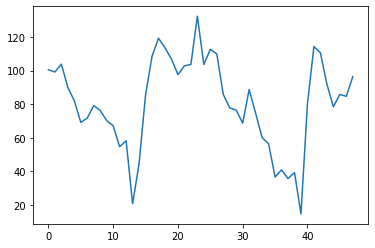

In [142]:
plt.plot(means1)